In [2]:
# Importing necessary Libraries
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

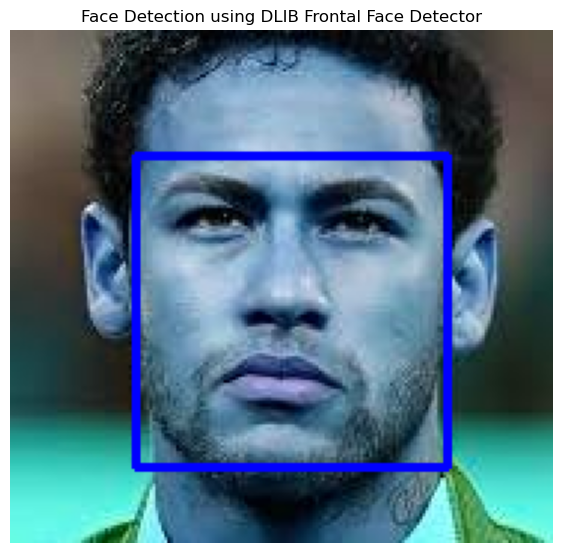

In [3]:
'''Creating a function to detect faces using dlib library. It used frontal face detector to detect faces in the images. Image path
is given to the function and then the image is loaded and thereafter converted to gray scaled as frontal face detector only detect 
faces in gray scale images. Then after the face is detected a rectangular box is made around it to showcase the working of model.'''
def detect_face_using_dlib(image_path):
    # Load the image
    image =cv2.imread(image_path)

    #Convert image ot grayscale for face detection
    if image is not None:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load dlib's face detector 
    detector = dlib.get_frontal_face_detector()

    # Detect faces
    faces = detector(gray_image)

    #Drawing bouding box around each face
    for face in faces:
        #Extracting x and y coordinates along with its width and height
        x,y,w,h = (face.left(), face.top(), face.width(), face.height())
        cv2.rectangle(image, pt1 = (x,y), pt2 = (x+w,y+h), color = (0,0,255), thickness=2)

    #Plotting the image
    plt.figure(figsize=(7,10))
    plt.imshow(image)
    plt.title("Face Detection using DLIB Frontal Face Detector")
    plt.axis('off')

detect_face_using_dlib("/Users/shriyansh/Documents/Data Science/projects/OPENCv/Face recognition/images/download (35).jpeg")

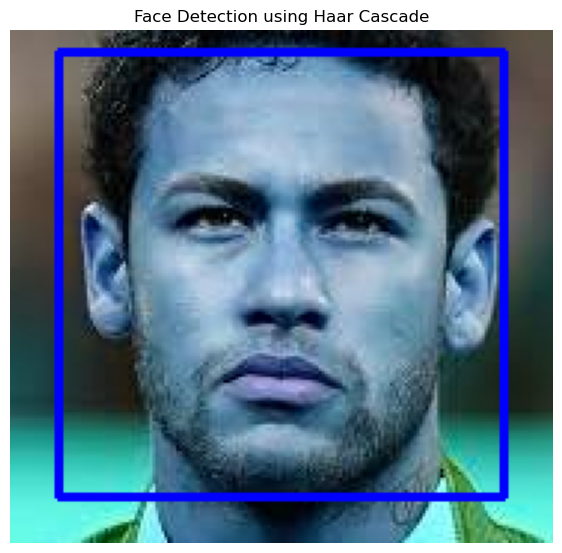

In [16]:
'''Creating function to detect faces using haar cascade. Image and pre trained models are loaded and then image is converted to 
grayscale to detect faces. Bounding box is made on the face using the dimensions extracted from the pre trained model.'''
def detect_face_using_haar_cascade(image_path):
    #Load the image
    image =cv2.imread(image_path)

    # Load the pre-trained model Haar Cascade for face detectiom
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Converting image to gray scale
    if image is not None:   
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Detecting face  
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.58, minNeighbors=5, minSize= (30,30))

    #Drawing bouding box around each face
    for (x,y,w,h) in faces:
        cv2.rectangle(image, pt1 = (x,y), pt2 = (x+w,y+h), color = (0,0,255), thickness=2)

    plt.figure(figsize=(7,8))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Face Detection using Haar Cascade")

detect_face_using_haar_cascade("/Users/shriyansh/Documents/Data Science/projects/OPENCv/Face recognition/images/download (35).jpeg")

In [7]:
'''This function draws a bounding box around detected faces in real-time. Real-time face detection has numerous practical 
applications in daily life. The process is similar to image-based detection, but in this case, it processes video frames, 
detecting and marking faces with bounding boxes as they appear in real-time.'''
def real_time_using_dlib():
    #Initialize Video Capture
    cap = cv2.VideoCapture(0)
    #Check if the camera is successfully opened
    if not cap.isOpened():
        print("Camera not working")
    # Infinite loop to keep capturing video frames
    while True:
        # Read a frame from the camera
        r,frame = cap.read()
        if not r:
            print("Frame cannot be opened")
            break

        #Convert the image to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        #Initialize the Dlib face detector
        detector = dlib.get_frontal_face_detector()

        #Detect faces in grayscale image
        faces = detector(gray)

        #Loop over each detected face and draw a bounding box around it
        for face in faces:
            # Get the coordinates of the bounding box
            x,y,w,h = (face.left(), face.top(), face.width(), face.height())
            # Draw a rectangle on the frame around the face
            cv2.rectangle(frame, pt1 = (x,y), pt2 = (x+w,y+h), color = (0,255,0), thickness=2)
        #Display the frame with the bounding box around the face in a window
        cv2.imshow("Real Time Face Detection using dlib",frame)
        # Wait for a key press and exit the loop if 'q' is pressed
        if cv2.waitKey(2) & 0xff ==ord('q'):
            break
            
    # Release the camera once the loop is finished     
    cap.release()

    # Close all Opencv Windows
    cv2.destroyAllWindows()

real_time_using_dlib()

In [23]:
'''Real Time Face Detection using HaarCascade'''
def real_time_using_haarcascade():
    #Initialize Video Capture
    cap = cv2.VideoCapture(0)

    #Check is camera is working
    if not cap.isOpened():
        print("Camera is not Working")

    # Infinite Loop to read all the frames
    while True:
        # Read a frame from the camera
        r,frame = cap.read()

        # Check if frame is captured or no
        if not r:
            print("Frame is not captured.")

        #Comvert the image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


        # Load pre trained Haar Cascade model
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        
        # Detect faces using Haar Cascade pre trained model
        faces = face_cascade.detectMultiScale(gray, minNeighbors = 5, scaleFactor = 1.1, minSize=(30,30))

        #Get the coordinates of the bounding box
        for (x,y,w,h) in faces:
            #Draw a rectangle around the face 
            cv2.rectangle(frame, pt1 = (x,y), pt2 = (x+w,y+h), color = (0,255,0),thickness=2 )
            
        # display the frame with bounding box 
        cv2.imshow("Real Time Face Detection using HaarCascade",frame)

        #Wait for key press and close the window when q is presses 
        if cv2.waitKey(2) & 0xff == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()
real_time_using_haarcascade()